In [31]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import os.path
import matplotlib.pyplot as plt
import glob
import seaborn as sns

In [32]:
df = pd.read_csv("./campaigns.csv")

In [33]:
df.sort_values("Open Rate", ascending = False)

,Title,Subject,List,Send Date,Send Weekday,Total Recipients,Successful Deliveries,Soft Bounces,Hard Bounces,Total Bounces,...,Click Rate,Total Clicks,Unsubscribes,Abuse Complaints,Times Liked on Facebook,Folder Id,Unique Id,Total Orders,Total Gross Sales,Total Revenue
12,Newsletter 7 (copy 01),hey... we need to talk.,the root,"Sep 23, 2019 06:00 am",Monday,48,48,0,0,0,...,8.33%,8,0,0,0,0,e13f190738,0,0,0
13,[Re-sent] Newsletter 7 (copy 01),hey... we need to talk.,the root,"Sep 23, 2019 10:02 pm",Monday,5,5,0,0,0,...,0.00%,0,0,0,0,0,b32ab10184,0,0,0
3,newsletter 2 (copy 01),get. that. money. (newsletter no. 2),the root,"Aug 19, 2019 04:50 pm",Monday,4,4,0,0,0,...,0.00%,0,0,0,0,0,947745607a,0,0,0
2,newsletter 2,get. that. money. (newsletter no. 2),the root,"Aug 19, 2019 07:02 am",Monday,233,232,1,0,1,...,0.00%,0,0,0,0,0,9678b64e0a,0,0,0
4,newsletter 3,all. i. see. is. $$$$ (newsletter no. 3),the root,"Aug 26, 2019 07:00 am",Monday,254,253,1,0,1,...,0.00%,0,3,0,0,0,2ce6a43658,0,0,0
22,Newsletter 12.1 | Winner,rip vine. 😢,the root,"Oct 28, 2019 10:00 am",Monday,264,264,0,0,0,...,4.55%,26,0,0,0,0,c51665f524,0,0,0
0,newsletter no.1,newsletter no.1,the root,"Aug 12, 2019 06:58 am",Monday,212,210,1,1,2,...,4.29%,17,3,0,0,0,52dc3b9652,0,0,0
17,Newsletter 9 (copy 01),hi... DTR? ⌛,the root,"Oct 14, 2019 09:11 am",Monday,392,391,1,0,1,...,11.51%,105,2,0,0,0,9ba4b7abbe,0,0,0
21,Newsletter 12.1,NaN,the root,"Oct 28, 2019 07:00 am",Monday,528,526,1,1,2,...,3.99%,0,0,0,0,0,25126672dc,0,0,0
19,Newsletter 12.1 | Combo 1,rip vine. 😢,the root,"Oct 28, 2019 06:59 am",Monday,132,131,0,1,1,...,3.82%,17,0,0,0,0,ef10bb704b,0,0,0


In [34]:
df_interest = df.iloc[:, 0:21]
metrics1 = df_interest.iloc[:, 1]
metrics2 = df_interest.iloc[:, 5:9]
metrics3 = df_interest.iloc[:, 12:18]
metrics = pd.concat([metrics1, metrics2, metrics3], axis = 1)

In [35]:
metrics

,Subject,Total Recipients,Successful Deliveries,Soft Bounces,Hard Bounces,Unique Opens,Open Rate,Total Opens,Unique Clicks,Click Rate,Total Clicks
0,newsletter no.1,212,210,1,1,113,53.81%,280,9,4.29%,17
1,newsletter no.1,1,1,0,0,1,100.00%,2,0,0.00%,0
2,get. that. money. (newsletter no. 2),233,232,1,0,129,55.60%,235,0,0.00%,0
3,get. that. money. (newsletter no. 2),4,4,0,0,3,75.00%,7,0,0.00%,0
4,all. i. see. is. $$$$ (newsletter no. 3),254,253,1,0,140,55.34%,251,0,0.00%,0
5,all. i. see. is. $$$$ (newsletter no. 3),125,124,1,0,35,28.23%,53,0,0.00%,0
6,turns out i'm 100% that rich.,268,266,2,0,120,45.11%,227,5,1.88%,8
7,turns out i'm 100% that rich.,159,158,0,1,24,15.19%,35,0,0.00%,0
8,if you're reading this...,278,278,0,0,121,43.53%,214,2,0.72%,3
9,hey... we need to talk,283,282,1,0,106,37.59%,240,3,1.06%,6


<Figure size 2160x2160 with 0 Axes>

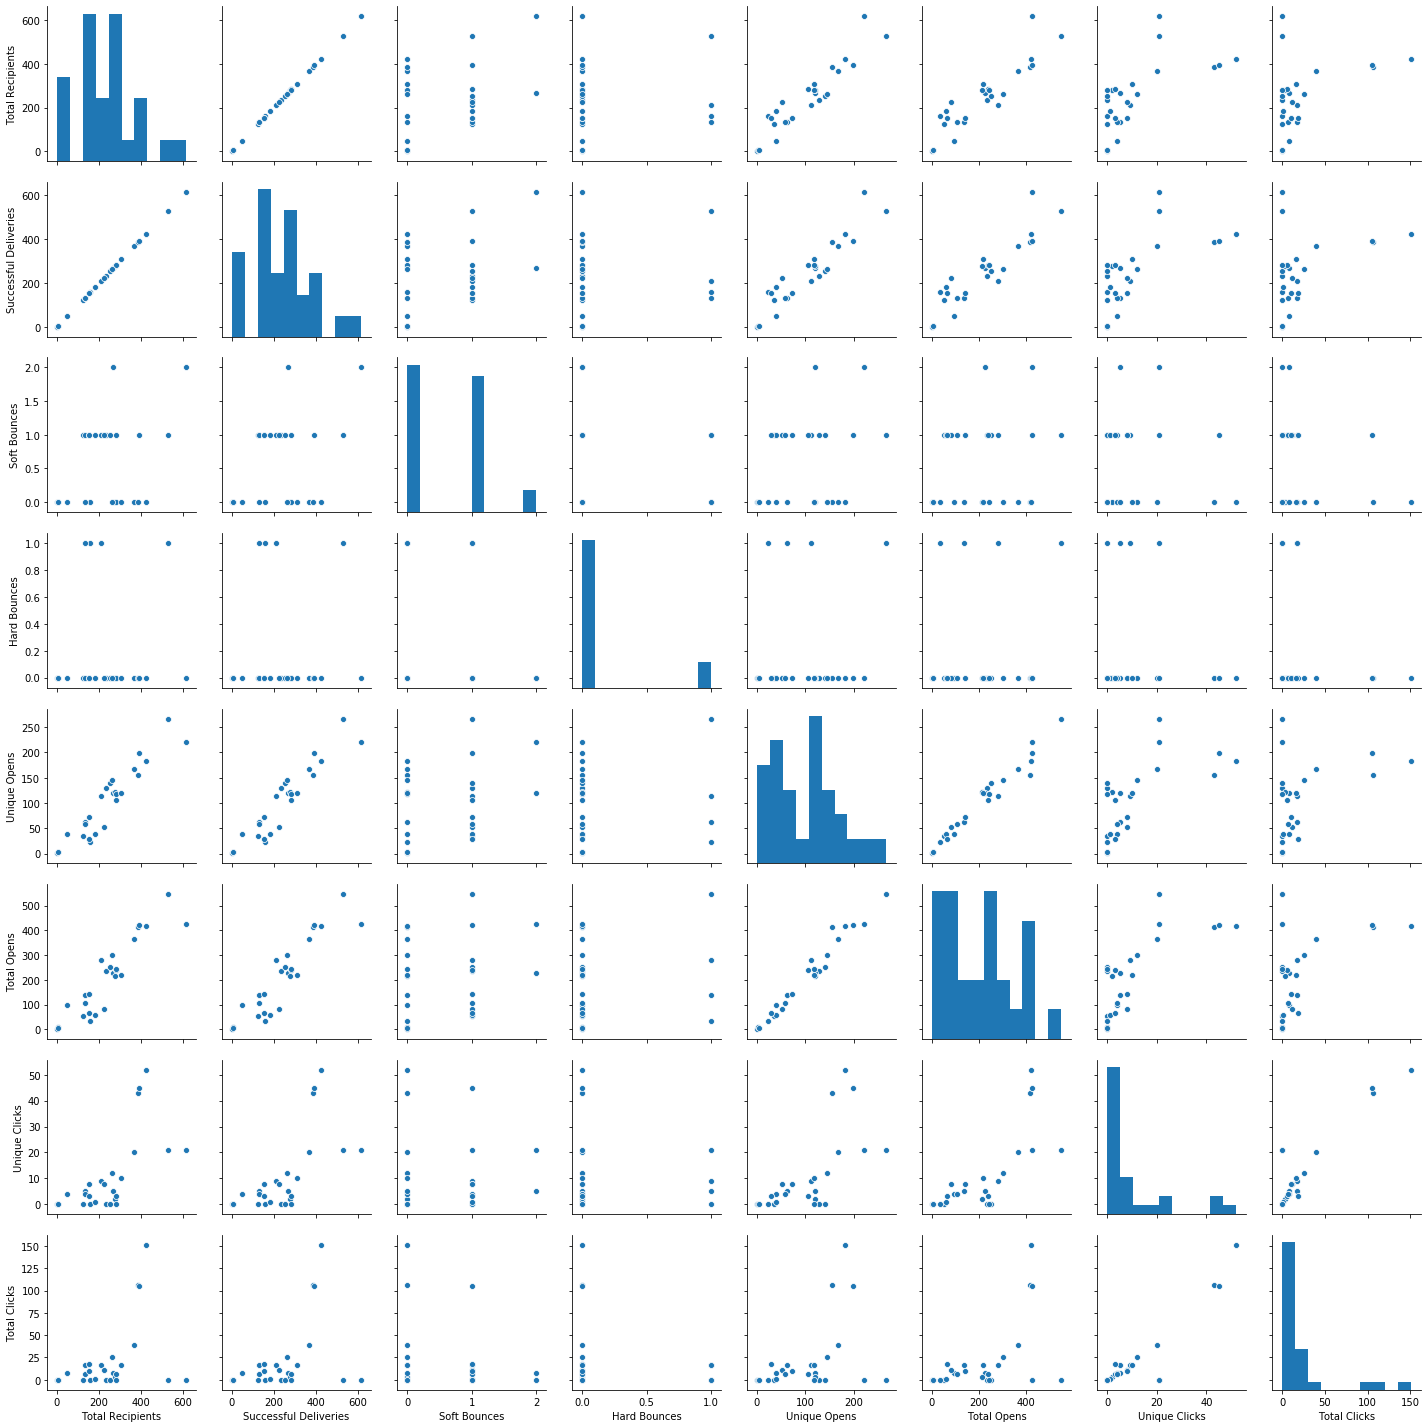

In [48]:
plt.figure(figsize = (30,30))
sns.pairplot(metrics)

<Figure size 1800x1800 with 0 Axes>

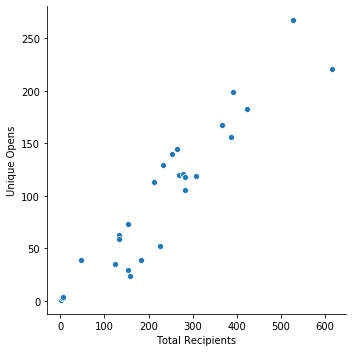

In [47]:
plt.figure(figsize = (25,25))
sns.relplot(x="Total Recipients", y = "Unique Opens", data = metrics)